<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Python_for_finance_O'reilly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chap 1

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
# Monte Carlo valuation of European call option
# in Black-Scholes-Merton model
# bsm_mcs_euro.py
#
# Python for Finance, 2nd ed.
# (c) Dr. Yves J. Hilpisch
#
import math
import numpy as np

# Parameter Values
S0 = 100.  # initial index level
K = 105.  # strike price
T = 1.0  # time-to-maturity
r = 0.05  # riskless short rate
sigma = 0.2  # volatility

I = 100000  # number of simulations

# Valuation Algorithm
z = np.random.standard_normal(I)  # pseudo-random numbers
# index values at maturity
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * z)
hT = np.maximum(ST - K, 0)  # payoff at maturity
C0 = math.exp(-r * T) * np.mean(hT)  # Monte Carlo estimator

# Result Output
print('Value of the European call option %5.3f.' % C0)

Value of the European call option 8.043.


In [ ]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

1 loop, best of 3: 1.13 s per loop


In [ ]:

import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

10 loops, best of 3: 126 ms per loop


In [ ]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

10 loops, best of 3: 111 ms per loop


In [ ]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

10 loops, best of 3: 91 ms per loop


# III. Financial data science

# Chap 7 Data visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

import cufflinks as cf
import plotly.offline as plyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

#plyo.init_notebook_mode(connected=True)

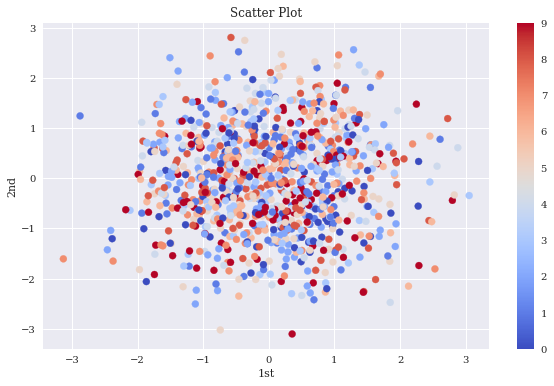

In [ ]:
y = np.random.standard_normal((1000, 2))
c = np.random.randint(0, 10, len(y))

plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1],
            c=c,  
            cmap='coolwarm',  
            marker='o')  
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot');
# plt.savefig('../../images/ch07/mpl_15')

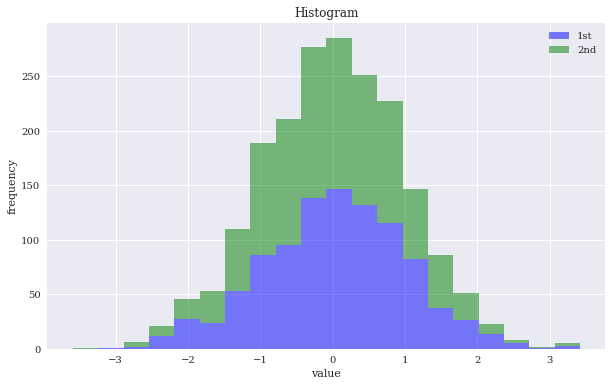

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'],
            stacked=True, bins=20, alpha=0.5)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

In [ ]:
a = np.random.standard_normal((250, 5)).cumsum(axis=0)
index = pd.date_range('2019-1-1',  
                      freq='B',  
                      periods=len(a))
df = pd.DataFrame(100 + 5 * a,  
                  columns=list('abcde'),  
                  index=index)
df


,a,b,c,d,e
2019-01-01,103.314586,106.823331,105.584824,101.271706,100.910055
2019-01-02,96.409342,107.947419,107.697706,97.175791,85.600200
2019-01-03,94.032763,108.037322,110.375230,96.460050,82.366771
2019-01-04,99.475815,111.851467,119.116417,103.379958,89.112064
2019-01-07,95.233851,106.526039,122.560290,104.812579,97.630931
...,...,...,...,...,...
2019-12-10,48.313066,111.860707,117.707219,52.074648,-26.595410
2019-12-11,49.690154,111.923968,117.954063,50.066133,-27.595732
2019-12-12,46.484317,116.240120,118.752066,51.677662,-23.591694
2019-12-13,47.973521,121.234279,131.018599,56.169765,-25.932556


In [ ]:
plyo.iplot(  
    df.iplot(asFigure=True),  
    #image='png',  
    #filename='ply_01'  
)

In [ ]:
df.iplot(asFigure=True)

In [ ]:

plyo.iplot(
    df[['a', 'b']].iplot(asFigure=True,
             theme='polar',  
             title='A Time Series Plot',  
             xTitle='date',  
             yTitle='value',  
             mode={'a': 'markers', 'b': 'lines+markers'},  
             symbol={'a': 'circle', 'b': 'diamond'},  
             size=3.5,  
             colors={'a': 'blue', 'b': 'magenta'},  
                        ),
    #image='png',
    #filename='ply_02'
)

In [ ]:
plyo.iplot(
    df.iplot(kind='hist',  
             subplots=True,  
             bins=15,  
             asFigure=True),
    #image='png',
    #filename='ply_03'
)


Financial Plotting

In [ ]:
!pip install fxcmpy

     |████████████████████████████████| 204kB 6.6MB/s 
  Created wheel for socketIO-client: filename=socketIO_client-0.7.2-cp36-none-any.whl size=23706 sha256=1ba1625e3ba7abc90a0d8c007ed6450c11debb2d497874b38409016133ebfda7
  Stored in directory: /root/.cache/pip/wheels/bd/5d/9f/ebc0c223ec59641877c817eb10442627e69af88c126f1f53a8
Successfully built socketIO-client


In [ ]:
!pip install socketIO_client

In [ ]:
!pip install python-socketio

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 51kB 3.7MB/s 


In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.0MB/s 


In [ ]:
import importlib
import datetime as dt
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [ ]:

start = dt.datetime(2018, 2, 1)
end = dt.datetime(2018, 3, 15)
period='m1'
dr = cdr('EURUSD', start, end,period, verbosity=True)
dr.get_data().to_csv('fxcm_eur_usd_eod_data.csv')

Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/5.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/6.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/7.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/8.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/9.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/10.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/11.csv.gz


In [ ]:
start = dt.datetime(2017, 7, 1)
end = dt.datetime(2017, 11, 15)
period='D1'
dr = cdr('EURUSD', start, end,period, verbosity=True)
dr.get_data().info()

Fetching data from: https://candledata.fxcorporate.com/D1/EURUSD/2017.csv.gz
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 2017-01-02 22:00:00 to 2017-12-31 22:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   309 non-null    float64
 1   BidHigh   309 non-null    float64
 2   BidLow    309 non-null    float64
 3   BidClose  309 non-null    float64
 4   AskOpen   309 non-null    float64
 5   AskHigh   309 non-null    float64
 6   AskLow    309 non-null    float64
 7   AskClose  309 non-null    float64
dtypes: float64(8)
memory usage: 21.7 KB


In [ ]:
dr.get_data().head()

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
2017-01-02 22:00:00,1.05174,1.05174,1.03402,1.04048,1.05295,1.05295,1.03406,1.04065
2017-01-03 22:00:00,1.04048,1.04999,1.03897,1.04864,1.04065,1.05004,1.03897,1.04922
2017-01-04 22:00:00,1.04864,1.06152,1.04807,1.06050,1.04922,1.06155,1.04811,1.06085
2017-01-05 22:00:00,1.06050,1.06220,1.05250,1.05319,1.06085,1.06241,1.05251,1.05372
2017-01-07 22:00:00,1.05319,1.05319,1.05267,1.05291,1.05372,1.05372,1.05300,1.05319


In [ ]:
dr.get_data().iplot(asFigure=True)

In [ ]:
raw=dr.get_data()
quotes = raw[['AskOpen', 'AskHigh', 'AskLow', 'AskClose']]
quotes = quotes.iloc[-60:]
quotes.tail()

,AskOpen,AskHigh,AskLow,AskClose
2017-12-25 22:00:00,1.18667,1.18791,1.18467,1.18587
2017-12-26 22:00:00,1.18587,1.19104,1.18552,1.18885
2017-12-27 22:00:00,1.18885,1.19592,1.18885,1.19426
2017-12-28 22:00:00,1.19426,1.20256,1.19369,1.20092
2017-12-31 22:00:00,1.20092,1.20144,1.19994,1.20144


During instantiation, the QuantFig object takes the DataFrame object as input
and allows for some basic customization. Plotting the data stored in the
QuantFig object qf then happens with the qf.iplot() method (see Figure 7-
25):

In [ ]:
qf = cf.QuantFig(
quotes,
title='EUR/USD Exchange Rate',
legend='top',
name='EUR/USD'
)

In [ ]:
plyo.iplot(
qf.iplot(asFigure=True),
#image='png',
#filename='qf_01'
)

In [ ]:
qf.add_bollinger_bands(periods=15,
boll_std=2)
qf.iplot(asFigure=True)

In [ ]:
qf.add_rsi(periods=14,
showbands=False)
qf.iplot(asFigure=True)

# Chap 8. Financial Time Series

## Financial Data

In [ ]:
import numpy as np
import pandas as pd
import cufflinks as cf
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/source/tr_eikon_eod_data.csv',  
                   index_col=0, 
                   parse_dates=True)
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [ ]:
data.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01d1229cf8>,
      dtype=object)

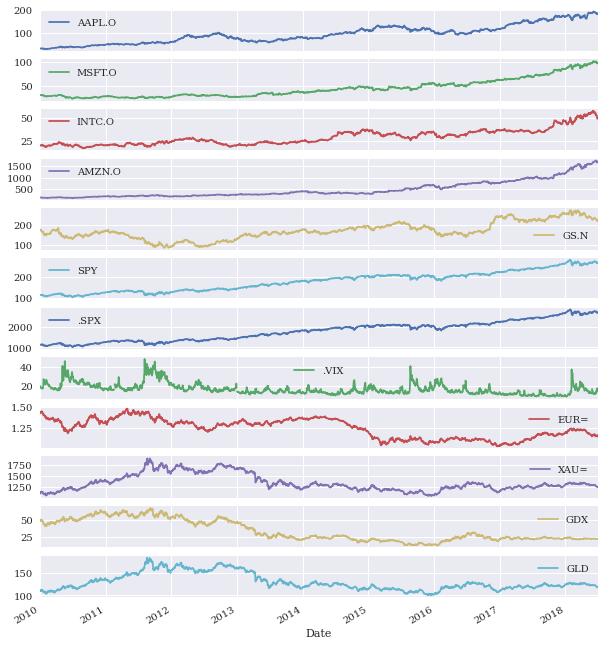

In [ ]:
data.plot(figsize=(10, 12), subplots=True)

The data used is from the Thomson Reuters (TR) Eikon Data API. In the TR
world symbols for financial instruments are called Reuters Instrument Codes
(RICs). The financial instruments that the single RICs represent are:

In [ ]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [ ]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [ ]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [ ]:
data.mean()

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [ ]:
data.aggregate([min,
              np.mean,
              np.std,
              np.median,
              max]
              ).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


Changes over Time

Statistical analysis methods are often based on changes over time and not the
absolute values themselves. There are multiple options to calculate the
changes in a time series over time, including absolute differences, percentage
changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [ ]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [ ]:
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


In [ ]:
data.diff().mean()

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage
changes are usually preferred. The following code derives the percentage
changes or percentage returns (also: simple returns) in a financial context and
visualizes their mean values per column (see Figure 8-2):

In [ ]:
data.pct_change().round(3).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


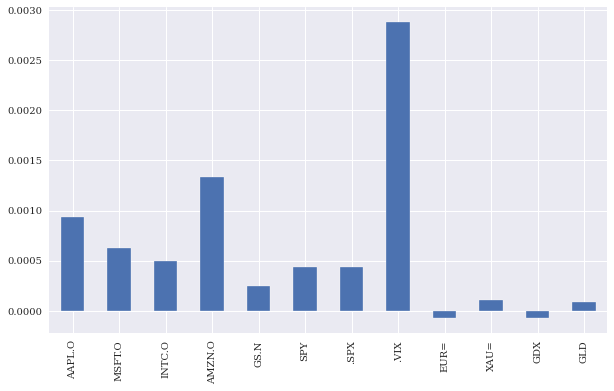

In [ ]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

As an alternative to percentage returns, log returns can be used. In some
scenarios, they are easier to handle and therefore often preferred in a financial
context.2 Figure 8-3 shows the cumulative log returns for the single financial
time series. This type of plot leads to some form of normalization:

In [ ]:
rets = np.log(data / data.shift(1))
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


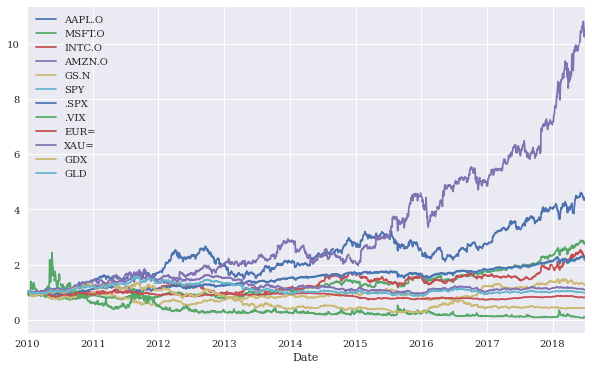

In [ ]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

Resampling

Resampling is an important operation on financial time series data. Usually
this takes the form of downsampling, meaning that, for example, a tick data
series is resampled to one-minute intervals or a time series with daily
observations is resampled to one with weekly or monthly observations (as
shown in Figure 8-4):

In [ ]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [ ]:
data.resample('1w', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [ ]:
data.resample('1m', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


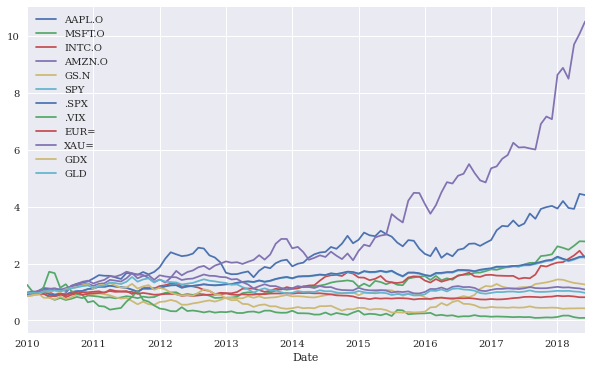

In [ ]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last(
).plot(figsize=(10, 6));

## Rolling Statistics

It is financial tradition to work with rolling statistics, often also called
financial indicators or financial studies. Such rolling statistics are basic tools
for financial chartists and technical traders, for example. This section works
with a single financial time series only:

In [ ]:
sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


An Overview

It is straightforward to derive standard rolling statistics with pandas:

In [ ]:
window = 20
data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['std'] = data[sym].rolling(window=window).std()
data['median'] = data[sym].rolling(window=window).median()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()

In [ ]:
data.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.818544,27.437544,29.580892,0.933650,29.821542,30.719969,27.805432
2010-02-02,27.979972,27.437544,29.451249,0.968048,29.711113,30.719969,27.936337
2010-02-03,28.461400,27.437544,29.343035,0.950665,29.685970,30.719969,28.330134
2010-02-04,27.435687,27.435687,29.207892,1.021129,29.547113,30.719969,27.659299
2010-02-05,27.922829,27.435687,29.099892,1.037811,29.419256,30.719969,27.856947


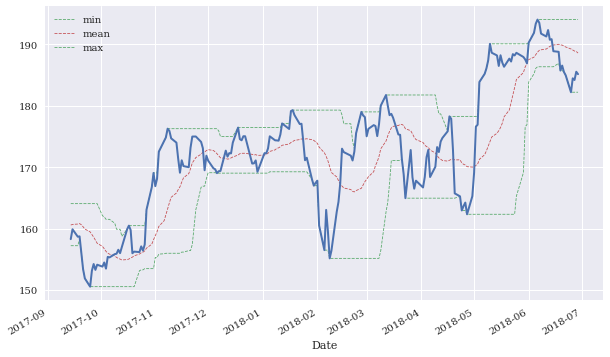

In [ ]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
# Plots three rolling statistics for the final 200 data rows.
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);
# Adds the original time series data to the plot.

A Technical Analysis Example

Rolling statistics are a major tool in the so-called technical analysis of stocks,
as compared to the fundamental analysis which focuses, for instance, on
financial reports and the strategic positions of the company whose stock is
being analyzed.

A decades-old trading strategy based on technical analysis is using two
simple moving averages (SMAs). The idea is that the trader should go long
on a stock (or financial instrument in general) when the shorter-term SMA is
above the longer-term SMA and should go short when the opposite holds
true. The concepts can be made precise with pandas and the capabilities of
the DataFrame object.

Rolling statistics are generally only calculated when there is enough data
given the window parameter specification. As Figure 8-6 shows, the SMA
time series only start at the day for which there is enough data given the
specific parameterization:

In [ ]:
data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


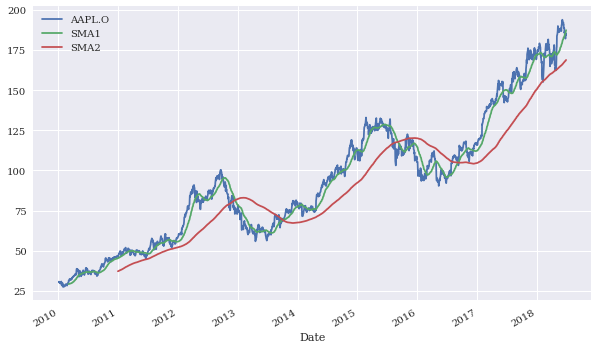

In [ ]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6));

In this context, the SMAs are only a means to an end. They are used to derive
positions to implement a trading strategy. Figure 8-7 visualizes a long
position by a value of 1 and a short position by a value of -1. The change in
the position is triggered (visually) by a crossover of the two lines
representing the SMA time series:

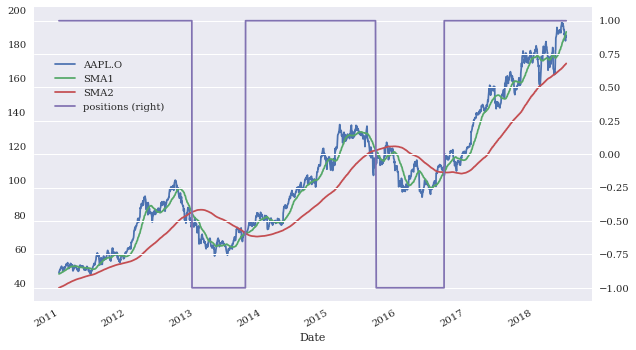

In [ ]:
data.dropna(inplace=True)
data['positions'] = np.where(data['SMA1'] > data['SMA2'],1,-1)

ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
secondary_y='positions')

ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

The trading strategy implicitly derived here only leads to a few trades per se:
only when the position value changes (i.e., a crossover happens) does a trade
take place. Including opening and closing trades, this would add up to just six
trades in total.

## Correlation Analysis

As a further illustration of how to work with pandas and financial time series
data, consider the case of the S&P 500 stock index and the VIX volatility
index. It is a stylized fact that when the S&P 500 rises, the VIX falls in
general, and vice versa. This is about correlation and not causation. This
section shows how to come up with some supporting statistical evidence for
the stylized fact that the S&P 500 and the VIX are (highly) negatively
correlated.4

In [ ]:
raw = pd.read_csv('https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/source/tr_eikon_eod_data.csv',
index_col=0, parse_dates=True)
data = raw[['.SPX', '.VIX']].dropna()
data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


Reads the EOD data (originally from the Thomson Reuters Eikon Data
API) from a CSV file

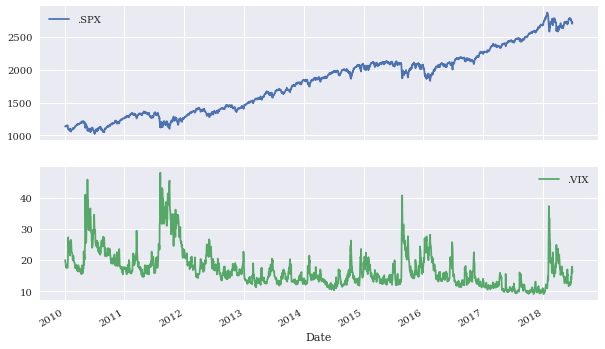

In [ ]:
data.plot(subplots=True, figsize=(10, 6));

When plotting (parts of) the two time series in a single plot and with adjusted
scalings, the stylized fact of negative correlation between the two indices
becomes evident through simple visual inspection (Figure 8-9):

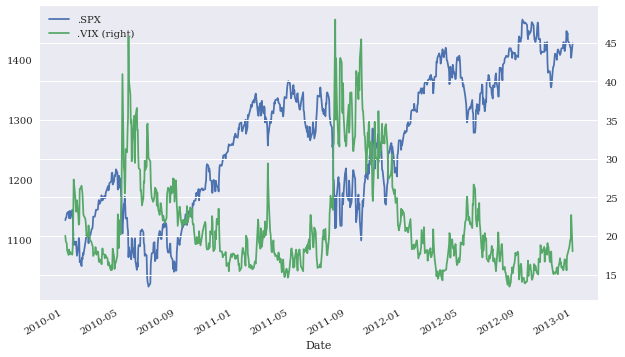

In [ ]:
 data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));

Logarithmic Returns

As pointed out earlier, statistical analysis in general relies on returns instead
of absolute changes or even absolute values. Therefore, we’ll calculate log
returns first before any further analysis takes place. Figure 8-10 shows the
high variability of the log returns over time. For both indices so-called
“volatility clusters” can be spotted. In general, periods of high volatility in
the stock index are accompanied by the same phenomena in the volatility
index:

In [ ]:
rets = np.log(data / data.shift(1))
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


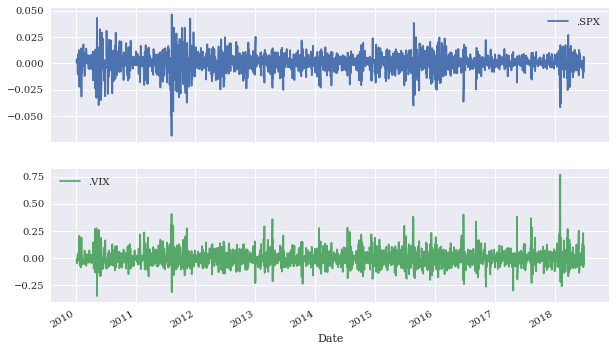

In [ ]:
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6));

In such a context, the pandas scatter_matrix() plotting function comes in
handy for visualizations. It plots the log returns of the two series against each
other, and one can add either a histogram or a kernel density estimator (KDE)
on the diagonal (see Figure 8-11):

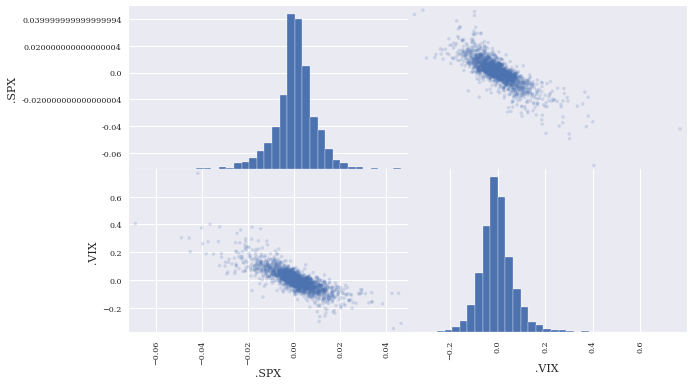

In [ ]:
pd.plotting.scatter_matrix(rets,
alpha=0.2,
diagonal='hist',
hist_kwds={'bins': 35},
figsize=(10, 6));

OLS Regression

With all these preparations, an ordinary least-squares (OLS) regression
analysis is convenient to implement. Figure 8-12 shows a scatter plot of the
log returns and the linear regression line through the cloud of dots. The slope
is obviously negative, providing support for the stylized fact about the
negative correlation between the two indices:

In [ ]:
 reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)
 reg

array([-6.65160028e+00,  2.62132142e-03])

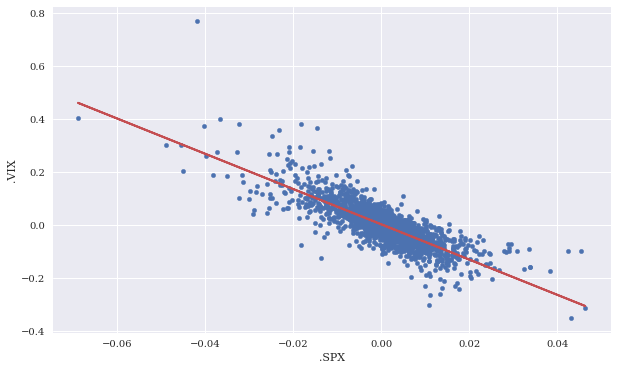

In [ ]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))
# This plots the log returns as a scatter plot …
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);
# … to which the linear regression line is added.

Correlation

Finally, we consider correlation measures directly. Two such measures are
considered: a static one taking into account the complete data set and a
rolling one showing the correlation for a fixed window over time. Figure 8-13
illustrates that the correlation indeed varies over time but that it is always,
given the parameterization, negative. This provides strong support for the
stylized fact that the S&P 500 and the VIX indices are (strongly) negatively
correlated:

In [ ]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


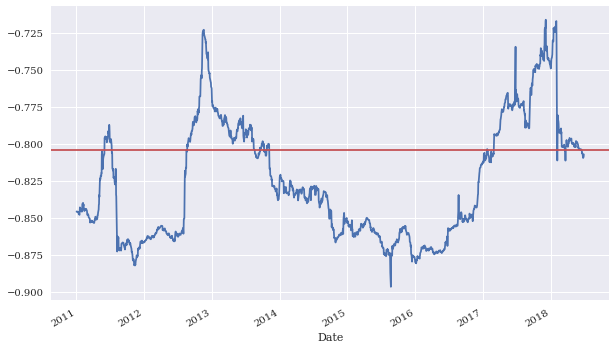

In [ ]:
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(10, 6))

ax.axhline(rets.corr().iloc[0, 1], c='r');

## High-Frequency Data

In [ ]:
%%time
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv('https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/source/fxcm_eur_usd_tick_data.csv',
index_col=0, parse_dates=True)

CPU times: user 479 ms, sys: 106 ms, total: 586 ms
Wall time: 3.04 s


In [ ]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     461357 non-null  float64
 1   Ask     461357 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


In [ ]:
tick

,Bid,Ask,Mid
2018-06-29 00:00:00.082,1.15635,1.15636,1.156355
2018-06-29 00:00:00.106,1.15634,1.15636,1.156350
2018-06-29 00:00:00.114,1.15634,1.15635,1.156345
2018-06-29 00:00:00.121,1.15634,1.15634,1.156340
2018-06-29 00:00:00.151,1.15632,1.15634,1.156330
...,...,...,...
2018-06-29 20:59:00.011,1.16815,1.16859,1.168370
2018-06-29 20:59:00.279,1.16815,1.16860,1.168375
2018-06-29 20:59:00.511,1.16816,1.16861,1.168385
2018-06-29 20:59:00.584,1.16817,1.16862,1.168395


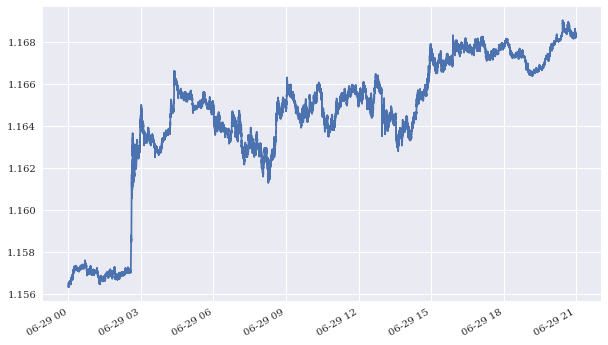

In [ ]:
 tick['Mid'] = tick.mean(axis=1)
 tick['Mid'].plot(figsize=(10, 6));

In [ ]:
tick_resam = tick.resample(rule='5min', label='right').last()
tick_resam.head()

,Bid,Ask,Mid
2018-06-29 00:05:00,1.15649,1.15651,1.156500
2018-06-29 00:10:00,1.15671,1.15672,1.156715
2018-06-29 00:15:00,1.15725,1.15727,1.157260
2018-06-29 00:20:00,1.15720,1.15722,1.157210
2018-06-29 00:25:00,1.15711,1.15712,1.157115


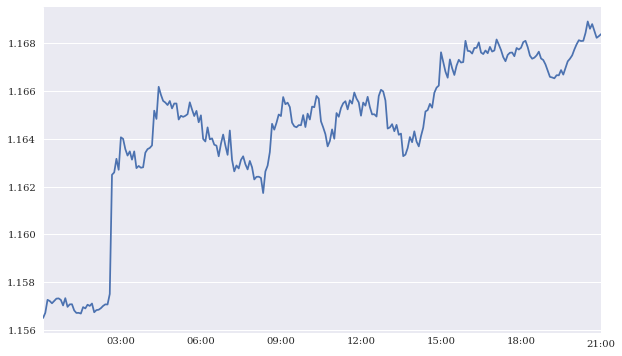

In [ ]:
tick_resam['Mid'].plot(figsize=(10, 6));

# Chapter 9. Input/Output Operations

In terms of frequency, single financial analytics tasks generally process data
of not more than a couple of gigabytes (GB) in size — and this is a sweet
spot for Python and the libraries of its scientific stack, such as NumPy, pandas,
and PyTables. Data sets of such a size can also be analyzed in-memory,
leading to generally high speeds with today’s CPUs and GPUs. However, the
data has to be read into RAM and the results have to be written to disk,
meanwhile ensuring that today’s performance requirements are met.

## Basic I/O with Python

In [ ]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
import pickle
import numpy as np
from random import gauss

In [ ]:
a = [gauss(1.5, 2) for i in range(1000000)]

In [ ]:
pkl_file = open('data.pkl', 'wb') # miss path
# Opens a file for writing in binary mode (wb)

The two major functions to serialize and deserialize Python objects are
pickle.dump(), for writing objects, and pickle.load(), for loading them
into memory:

In [ ]:
%time pickle.dump(a, pkl_file)

CPU times: user 24.2 ms, sys: 22.6 ms, total: 46.8 ms
Wall time: 52.4 ms


In [ ]:
pkl_file.close()

In [ ]:
#ll $path*
# Shows the file on disk and its size (Mac/Linux)

In [ ]:
pkl_file = open('data.pkl', 'rb') # miss path
# Opens the file for reading in binary mode (rb)

In [ ]:
 %time b = pickle.load(pkl_file)

CPU times: user 38.8 ms, sys: 22.4 ms, total: 61.2 ms
Wall time: 64.2 ms


In [ ]:
a[:3]

[-0.9116606736859998, 0.929650590458245, 4.53611598900058]

In [ ]:
b[:3]

[-0.9116606736859998, 0.929650590458245, 4.53611598900058]

In [ ]:
 np.allclose(np.array(a), np.array(b))
 #Converting a and b to ndarrary objects, np.allclose() verifies that both contain the same data (numbers).

True

Storing and retrieving a single object with pickle obviously is quite simple.
What about two objects?

In [ ]:
pkl_file = open('data.pkl', 'wb')

In [ ]:
%time pickle.dump(np.array(a), pkl_file)

CPU times: user 51 ms, sys: 5.79 ms, total: 56.8 ms
Wall time: 57.8 ms


In [ ]:
%time pickle.dump(np.array(a) ** 2, pkl_file)

CPU times: user 49.1 ms, sys: 7.83 ms, total: 57 ms
Wall time: 57.9 ms


In [ ]:
pkl_file.close()

In [ ]:
ll $path*

-rw-r--r-- 1 root 16000322 Jul  5 08:32 data.pkl

sample_data:
total 55504
-rwxr-xr-x 1 root     1697 Jan  1  2000 anscombe.json*
-rw-r--r-- 1 root   301141 Jun 26 16:26 california_housing_test.csv
-rw-r--r-- 1 root  1706430 Jun 26 16:26 california_housing_train.csv
-rw-r--r-- 1 root 18289443 Jun 26 16:26 mnist_test.csv
-rw-r--r-- 1 root 36523880 Jun 26 16:26 mnist_train_small.csv
-rwxr-xr-x 1 root      930 Jan  1  2000 README.md*


In [ ]:
pkl_file = open('data.pkl', 'rb')

In [ ]:
x = pickle.load(pkl_file)
x[:4]

array([-0.91166067,  0.92965059,  4.53611599,  0.93742109])

In [ ]:
y = pickle.load(pkl_file)
y[:4]

array([ 0.83112518,  0.86425022, 20.57634827,  0.87875829])

In [ ]:
 pkl_file.close()

In [ ]:
pkl_file = open('data.pkl', 'wb')
pickle.dump({'x': x, 'y': y}, pkl_file)
pkl_file.close()

In [ ]:
pkl_file = open('data.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
  print(key, data[key][:4])

x [-0.91166067  0.92965059  4.53611599  0.93742109]
y [ 0.83112518  0.86425022 20.57634827  0.87875829]


In [ ]:
!rm -f $path*

rm: cannot remove 'sample_data': Is a directory


Reading and Writing Text Files

Text processing can be considered a strength of Python. In fact, many
corporate and scientific users use Python for exactly this task. With Python
one has multiple options to work with str objects, as well as with text files in
general.
Assume the case of quite a large set of data that shall be shared as a CSV file.
Although such files have a special internal structure, they are basically plain
text files. The following code creates a dummy data set as an ndarray object,
creates a DatetimeIndex object, combines the two, and stores the data as a
CSV text file:

In [ ]:
import pandas as pd
rows = 5000
a = np.random.standard_normal((rows, 5)).round(4)
a

array([[ 0.228 , -0.026 ,  0.0037,  0.185 , -0.2329],
       [ 1.3641, -0.9662, -0.3072,  0.4617, -0.2081],
       [-0.3361,  1.1696, -0.2878, -2.1151, -2.0902],
       ...,
       [-2.0762,  1.5067, -0.4293, -0.2794, -0.1074],
       [-0.9958, -0.3398, -0.0745, -0.0044,  1.071 ],
       [ 0.0162,  0.736 ,  1.2081, -0.3082,  1.5868]])

In [ ]:
t = pd.date_range(start='2019/1/1', periods=rows, freq='H')
t

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-07-27 22:00:00', '2019-07-27 23:00:00',
               '2019-07-28 00:00:00', '2019-07-28 01:00:00',
               '2019-07-28 02:00:00', '2019-07-28 03:00:00',
               '2019-07-28 04:00:00', '2019-07-28 05:00:00',
               '2019-07-28 06:00:00', '2019-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [ ]:
csv_file = open('data.csv', 'w')
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [ ]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
  s = '{},{},{},{},{},{}\n'.format(t_, no1, no2, no3, no4, no5)
  csv_file.write(s)
csv_file.close()  

In [ ]:
ll $path*

-rw-r--r-- 1 root 284643 Jul  5 08:32 data.csv

sample_data:
total 55504
-rwxr-xr-x 1 root     1697 Jan  1  2000 anscombe.json*
-rw-r--r-- 1 root   301141 Jun 26 16:26 california_housing_test.csv
-rw-r--r-- 1 root  1706430 Jun 26 16:26 california_housing_train.csv
-rw-r--r-- 1 root 18289443 Jun 26 16:26 mnist_test.csv
-rw-r--r-- 1 root 36523880 Jun 26 16:26 mnist_train_small.csv
-rwxr-xr-x 1 root      930 Jan  1  2000 README.md*


In [ ]:
csv_file = open('data.csv', 'r')
for i in range(5):
  print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2019-01-01 00:00:00,0.228,-0.026,0.0037,0.185,-0.2329
2019-01-01 01:00:00,1.3641,-0.9662,-0.3072,0.4617,-0.2081
2019-01-01 02:00:00,-0.3361,1.1696,-0.2878,-2.1151,-2.0902
2019-01-01 03:00:00,-1.2849,0.4772,-2.2357,0.1994,0.1933


In [ ]:
csv_file.close()

In [ ]:
csv_file = open('data.csv', 'r')
content = csv_file.readlines()
content[:5]

['date,no1,no2,no3,no4,no5\n',
 '2019-01-01 00:00:00,0.228,-0.026,0.0037,0.185,-0.2329\n',
 '2019-01-01 01:00:00,1.3641,-0.9662,-0.3072,0.4617,-0.2081\n',
 '2019-01-01 02:00:00,-0.3361,1.1696,-0.2878,-2.1151,-2.0902\n',
 '2019-01-01 03:00:00,-1.2849,0.4772,-2.2357,0.1994,0.1933\n']

In [ ]:
csv_file.close()

# Chapter 10. Performance Python

## Loops

normal

In [ ]:
 import random

def average_py(n):
  s = 0
  for i in range(n):
    s += random.random()
  return s / n

In [ ]:
n = 100000000
%time average_py(n)

CPU times: user 9.35 s, sys: 1.57 ms, total: 9.35 s
Wall time: 9.36 s


0.5000105180192709

In [ ]:
%timeit average_py(n)

1 loop, best of 3: 946 ms per loop


In [ ]:
%time sum([random.random() for _ in range(n)]) / n

CPU times: user 1.28 s, sys: 270 ms, total: 1.55 s
Wall time: 1.55 s


0.4999863243297588

numba

In [ ]:
import numba
average_nb = numba.jit(average_py)
%time average_nb(n)

CPU times: user 678 ms, sys: 0 ns, total: 678 ms
Wall time: 681 ms


0.5000187102802918

In [ ]:
%time average_nb(n)

CPU times: user 613 ms, sys: 0 ns, total: 613 ms
Wall time: 612 ms


0.49994475383974796

In [ ]:
%timeit average_nb(n)

1 loop, best of 3: 602 ms per loop


numpy

In [ ]:
import numpy as np
def average_np(n):
  s = np.random.random(n)
  return s.mean()

In [ ]:
%time average_np(n)

CPU times: user 105 ms, sys: 1.94 ms, total: 107 ms
Wall time: 108 ms


0.5000559549211778

In [ ]:
%timeit average_np(n)

10 loops, best of 3: 99.4 ms per loop


In [ ]:
s = np.random.random(n)
s.nbytes

80000000

# Chapter 11. Mathematical Tools

# Chapter 12. Stochastics

# Chapter 13. Statistics

## Normality Tests

In [ ]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The following uses the function gen_paths() to generate sample Monte
Carlo paths for the geometric Brownian motion (see also Chapter 12):

In [ ]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0: float
        initial stock/index value
    r: float
        constant short rate
    sigma: float
        constant volatility
    T: float
        final time horizon
    M: int
        number of time steps/intervals
    I: int
        number of paths to be simulated
        
    Returns
    =======
    paths: ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()  
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * math.sqrt(dt) * rand)  
    return paths

In [ ]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
np.random.seed(1000)

In [ ]:
paths = gen_paths(S0, r, sigma, T, M, I)
S0 * math.exp(r * T)

105.12710963760242

In [ ]:
paths[-1].mean()

105.12645392478755

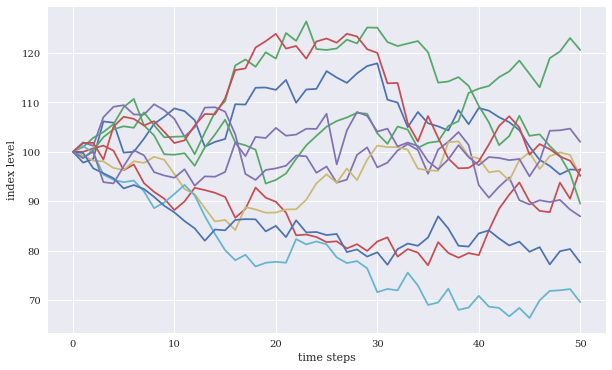

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level');

In [ ]:
import warnings; warnings.simplefilter('ignore')
import scipy.stats as scs
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [ ]:
log_returns = np.log(paths[1:] / paths[:-1])

In [ ]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


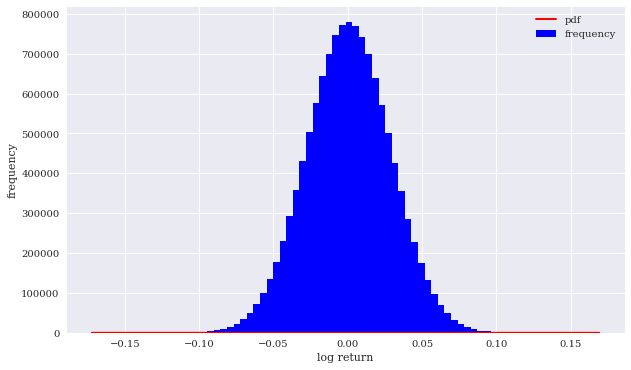

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, #normed=True,
         label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
'r', lw=2.0, label='pdf')
plt.legend();

In [ ]:
def normality_tests(arr):
  ''' Tests for normality distribution of given data set.
  Parameters
  ==========
  array: ndarray
  object to generate statistics on
  '''
  print('Skew of data set %14.3f' % scs.skew(arr))
  print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
  print('Kurt of data set %14.3f' % scs.kurtosis(arr))
  print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
  print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

Skewness test (skewtest())
This tests whether the skew of the sample data is “normal” (i.e., has a
value close enough to zero).

Kurtosis test (kurtosistest())
Similarly, this tests whether the kurtosis of the sample data is “normal”
(again, close enough to zero).

Normality test (normaltest())
This combines the other two test approaches to test for normality

In [ ]:
normality_tests(log_returns.flatten())

Skew of data set          0.001
Skew test p-value          0.430
Kurt of data set          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


Real-World Data

In [ ]:
raw = pd.read_csv('https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/source/tr_eikon_eod_data.csv',  
                   index_col=0, 
                   parse_dates=True)
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']
data = raw[symbols]
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2138 non-null   float64
 1   GLD     2138 non-null   float64
 2   AAPL.O  2138 non-null   float64
 3   MSFT.O  2138 non-null   float64
dtypes: float64(4)
memory usage: 83.5 KB


In [ ]:
data

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660
...,...,...,...,...
2018-06-25,271.00,119.89,182.170000,98.390
2018-06-26,271.60,119.26,184.430000,99.080
2018-06-27,269.35,118.58,184.160000,97.540


In [ ]:
 (data / data.iloc[0] * 100)

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.264714,99.908925,100.172889,100.032310
2010-01-06,100.335304,101.557377,98.579506,99.418417
2010-01-07,100.758846,100.928962,98.397271,98.390953
2010-01-08,101.094150,101.429872,99.051446,99.063005
...,...,...,...,...
2018-06-25,239.124680,109.189435,595.855930,317.899838
2018-06-26,239.654107,108.615665,603.248115,320.129241
2018-06-27,237.668755,107.996357,602.364978,315.153473


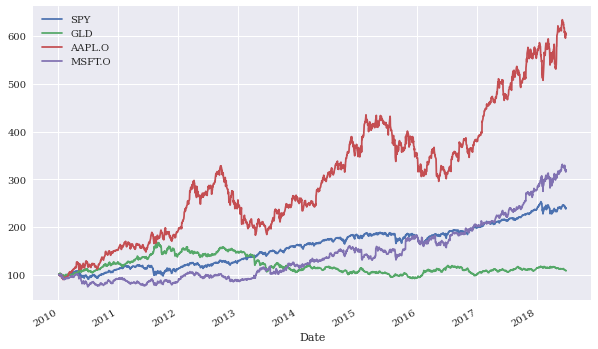

In [ ]:
 (data / data.iloc[0] * 100).plot(figsize=(10, 6))

In [ ]:
data / data.shift(1)

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,1.002647,0.999089,1.001729,1.000323
2010-01-06,1.000704,1.016500,0.984094,0.993863
2010-01-07,1.004221,0.993812,0.998151,0.989665
2010-01-08,1.003328,1.004963,1.006648,1.006830
...,...,...,...,...
2018-06-25,0.986387,0.996261,0.985129,0.979882
2018-06-26,1.002214,0.994745,1.012406,1.007013
2018-06-27,0.991716,0.994298,0.998536,0.984457


In [ ]:
log_returns = np.log(data / data.shift(1))
log_returns

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807
...,...,...,...,...
2018-06-25,-0.013706,-0.003746,-0.014983,-0.020323
2018-06-26,0.002212,-0.005269,0.012330,0.006988
2018-06-27,-0.008319,-0.005718,-0.001465,-0.015665


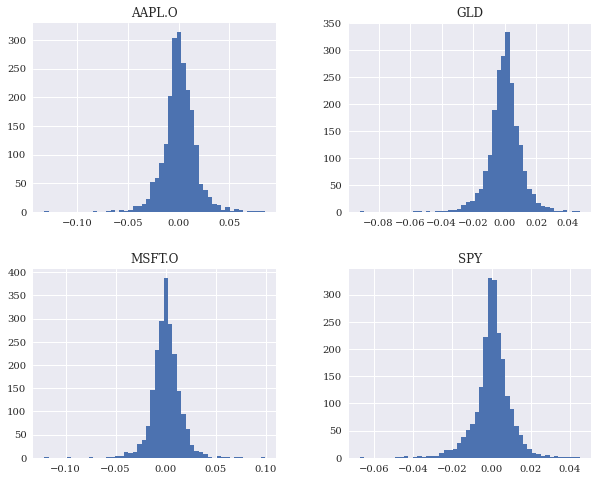

In [ ]:
log_returns.hist(bins=50, figsize=(10, 8));

As a next step, consider the different statistics for the time series data sets.
The kurtosis values seem to be especially far from normal for all four data
sets:

In [ ]:
np.array(log_returns['AAPL.O'].dropna())

array([ 0.0017274 , -0.0160342 , -0.00185031, ..., -0.00146504,
        0.00724994, -0.00210464])

In [ ]:
for sym in symbols:
  print('\nResults for symbol {}'.format(sym))
  print(30 * '-')
  log_data = np.array(log_returns[sym].dropna())
  print_statistics(log_data)


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.06734
           max         0.04545
          mean         0.00041
           std         0.00933
          skew        -0.52189
      kurtosis         4.52432

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.09191
           max         0.04795
          mean         0.00004
           std         0.01020
          skew        -0.59934
      kurtosis         5.68423

Results for symbol AAPL.O
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.13187
           max         0.08502
          mean         0.00084
           std         0.01591
          skew        -0.23510
      kurtosis         4.7

Figure 13-9 shows the QQ plot for the SPY ETF. Obviously, the sample
quantile values do not lie on a straight line, indicating “non-normality.” On
the left and right sides there are many values that lie well below the line and
well above the line, respectively. In other words, the time series data exhibits
fat tails. This term refers to a (frequency) distribution where large negative
and positive values are observed more often than a normal distribution would
imply. The same conclusions can be drawn from Figure 13-10, which
presents the data for the Microsoft stock. There also seems to be evidence for
a fat-tailed distribution:

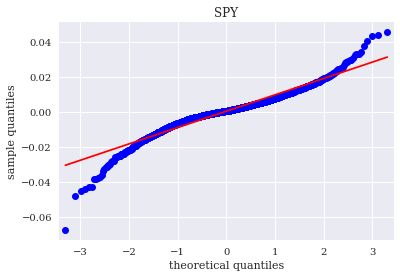

In [ ]:
 sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

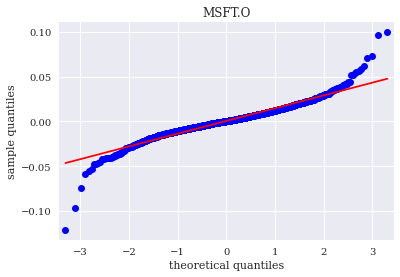

In [ ]:
sm.qqplot(log_returns['MSFT.O'].dropna(), line='s')
plt.title('MSFT.O')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

This finally leads to the statistical normality tests:

In [ ]:
def normality_tests(arr):
  ''' Tests for normality distribution of given data set.
  Parameters
  ==========
  array: ndarray
  object to generate statistics on
  '''
  print('Skew of data set %14.3f' % scs.skew(arr))
  print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
  print('Kurt of data set %14.3f' % scs.kurtosis(arr))
  print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
  print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [ ]:
for sym in symbols:
  print('\nResults for symbol {}'.format(sym))
  print(32 * '-')
  log_data = np.array(log_returns[sym].dropna())
  normality_tests(log_data)


Results for symbol SPY
--------------------------------
Skew of data set         -0.522
Skew test p-value          0.000
Kurt of data set          4.524
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set         -0.599
Skew test p-value          0.000
Kurt of data set          5.684
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL.O
--------------------------------
Skew of data set         -0.235
Skew test p-value          0.000
Kurt of data set          4.790
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT.O
--------------------------------
Skew of data set         -0.091
Skew test p-value          0.085
Kurt of data set          7.291
Kurt test p-value          0.000
Norm test p-value          0.000


The p-values of the different tests are all zero, strongly rejecting the test
hypothesis that the different sample data sets are normally distributed. This
shows that the normal assumption for stock market returns and other asset
classes — as, for example, embodied in the geometric Brownian motion
model — cannot be justified in general and that one might have to use richer
models that are able to generate fat tails (e.g., jump diffusion models or
models with stochastic volatility)

## Portfolio Optimization

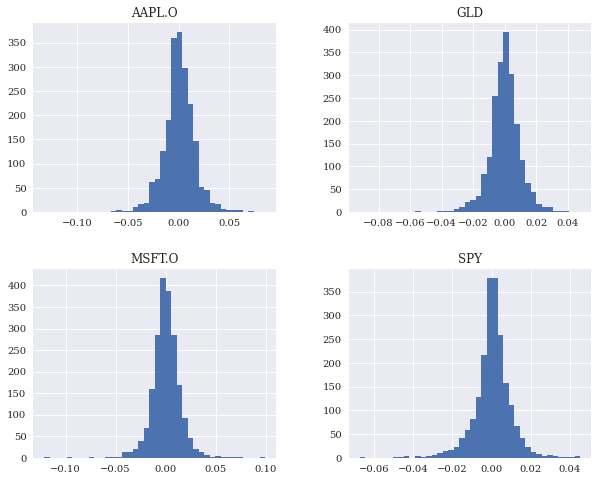

In [ ]:
 symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']
 noa = len(symbols)
 data = raw[symbols]
 rets = np.log(data / data.shift(1))
 rets.hist(bins=40, figsize=(10, 8));

In [ ]:
rets.mean()

AAPL.O    0.000719
MSFT.O    0.000495
SPY       0.000386
GLD      -0.000015
dtype: float64

In [ ]:
rets.mean() * 252
# Annualized mean returns

AAPL.O    0.181303
MSFT.O    0.124840
SPY       0.097286
GLD      -0.003784
dtype: float64

In [ ]:
rets.cov() * 252
# Annualized covariance matrix.

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.064034,0.023656,0.021154,0.001428
MSFT.O,0.023656,0.051211,0.022390,-0.000370
SPY,0.021154,0.022390,0.022049,0.000108
GLD,0.001428,-0.000370,0.000108,0.025945


# Part IV. Algorithmic Trading

# Chapter 14. The FXCM Trading Platform

In [2]:
! pip install fxcmpy

     |████████████████████████████████| 204kB 6.3MB/s 
  Created wheel for socketIO-client: filename=socketIO_client-0.7.2-cp36-none-any.whl size=23706 sha256=72ee753211d2ae565f31cf4ed9904626fa8a00eb338ed88374bf5553bba1b606
  Stored in directory: /root/.cache/pip/wheels/bd/5d/9f/ebc0c223ec59641877c817eb10442627e69af88c126f1f53a8
Successfully built socketIO-client


In [5]:
! pip install python-socketio

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 


In [6]:
import fxcmpy

In [7]:
YOUR_FXCM_API_TOKEN='4a8146587ec1dda0b3c9f8dbfe35b696d2688cc0'
api = fxcmpy.fxcmpy(access_token=YOUR_FXCM_API_TOKEN, log_level='error')

In [10]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [21]:
 from fxcmpy import fxcmpy_tick_data_reader as tdr

In [22]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [23]:
start = dt.datetime(2018, 6, 25)
stop = dt.datetime(2018, 6, 30)

In [24]:
td = tdr('EURUSD', start, stop)

In [25]:
td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1963779 entries, 06/24/2018 21:00:12.290 to 06/29/2018 20:59:00.607
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 44.9+ MB


In [26]:
td.get_data().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1963779 entries, 2018-06-24 21:00:12.290000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 44.9 MB


In [27]:
td.get_data().head()

,Bid,Ask
2018-06-24 21:00:12.290,1.1662,1.16660
2018-06-24 21:00:16.046,1.1662,1.16650
2018-06-24 21:00:22.846,1.1662,1.16658
2018-06-24 21:00:22.907,1.1662,1.16660
2018-06-24 21:00:23.441,1.1662,1.16663


In [28]:
sub = td.get_data(start='2018-06-29 12:00:00',
end='2018-06-29 12:15:00')
sub.head()

,Bid,Ask
2018-06-29 12:00:00.011,1.16497,1.16498
2018-06-29 12:00:00.071,1.16497,1.16497
2018-06-29 12:00:00.079,1.16497,1.16498
2018-06-29 12:00:00.091,1.16495,1.16498
2018-06-29 12:00:00.205,1.16496,1.16498


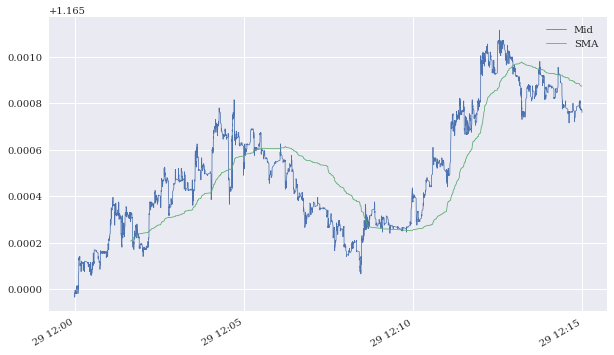

In [29]:
sub['Mid'] = sub.mean(axis=1)
sub['SMA'] = sub['Mid'].rolling(1000).mean()
sub[['Mid', 'SMA']].plot(figsize=(10, 6), lw=0.75);

In [47]:
from fxcmpy import fxcmpy_candles_data_reader as cdr
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [55]:
#start = dt.datetime(2018, 5, 1)
#stop = dt.datetime(2018, 6, 30)
start = dt.datetime(2020, 5, 1)
stop = dt.datetime(2020, 6, 30)
period = 'H1'
candles = cdr('EURUSD', start, stop, period) 
data = candles.get_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1080 entries, 2020-04-26 21:00:00 to 2020-06-26 20:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   1080 non-null   float64
 1   BidHigh   1080 non-null   float64
 2   BidLow    1080 non-null   float64
 3   BidClose  1080 non-null   float64
 4   AskOpen   1080 non-null   float64
 5   AskHigh   1080 non-null   float64
 6   AskLow    1080 non-null   float64
 7   AskClose  1080 non-null   float64
dtypes: float64(8)
memory usage: 75.9 KB


In [56]:
data.tail()

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
2020-06-26 16:00:00,1.12145,1.12350,1.12125,1.12295,1.12147,1.12347,1.12127,1.12297
2020-06-26 17:00:00,1.12295,1.12385,1.12283,1.12311,1.12297,1.12386,1.12286,1.12312
2020-06-26 18:00:00,1.12311,1.12317,1.12242,1.12269,1.12312,1.12317,1.12243,1.12271
2020-06-26 19:00:00,1.12269,1.12309,1.12233,1.12269,1.12271,1.12309,1.12234,1.12270
2020-06-26 20:00:00,1.12269,1.12294,1.12162,1.12162,1.12270,1.12296,1.12177,1.12215


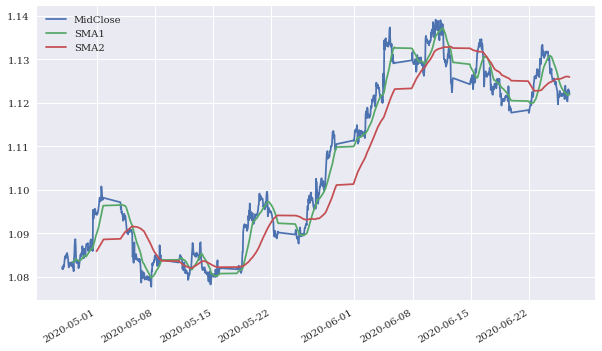

In [57]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)
data['SMA1'] = data['MidClose'].rolling(30).mean()
data['SMA2'] = data['MidClose'].rolling(100).mean()
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10, 6));

## Working with the API

While the previous sections demonstrate retrieving prepackaged historical
tick data and candles data from FXCM servers, this section shows how to
retrieve historical data via the API. For this, a connection object to the FXCM
API is needed. Therefore, first the import of the fxcmpy package, the
connection to the API (based on the unique API token), and a look at the
available instruments:

In [58]:
import fxcmpy
fxcmpy.__version__

'1.2.6'

In [ ]:
YOUR_FXCM_API_TOKEN='4a8146587ec1dda0b3c9f8dbfe35b696d2688cc0'
api = fxcmpy.fxcmpy(access_token=YOUR_FXCM_API_TOKEN, log_level='error')

In [59]:
instruments = api.get_instruments()

In [60]:
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'USOilSpot', 'UKOilSpot', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD', 'CryptoMajor', 'EOS/USD', 'XLM/USD', 'ESPORTS', 'BIOTECH', 'CANNABIS', 'FAANG', 'CHN.TECH', 'CHN.ECOMM', 'USEquities']


In [61]:
candles = api.get_candles('USD/JPY', period='D1', number=10)
candles[candles.columns[:4]]

,bidopen,bidclose,bidhigh,bidlow
date,,,,
2020-06-25 21:00:00,107.036,107.186,107.447,106.947
2020-06-26 21:00:00,107.186,107.187,107.355,106.791
2020-06-28 21:00:00,107.126,107.081,107.126,107.052
2020-06-29 21:00:00,107.081,107.549,107.878,107.034
2020-06-30 21:00:00,107.549,107.917,107.978,107.514
2020-07-01 21:00:00,107.917,107.456,108.159,107.355
2020-07-02 21:00:00,107.456,107.479,107.719,107.327
2020-07-03 21:00:00,107.479,107.480,107.563,107.428
2020-07-05 21:00:00,107.448,107.449,107.449,107.448
